**Lesson 10 – IRIS ML applications**

Let's build the IRIS dataset to illustrate Logistic Regression. The dataset contains the sepal and petal lenght and width of 150 iris flowers of three different species:
* iris setosa
* iris versicolor
* iris virginica

The aim is to build a classifier to detect the iris virginica type according to the petal width feature.

In [1]:
%run setup.ipynb

## Load dataset

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [6]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Train a model

Let's train a Logistic Regression model.

**Note**: To be future-proof we set `solver="lbfgs"`.

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

Determine the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm.

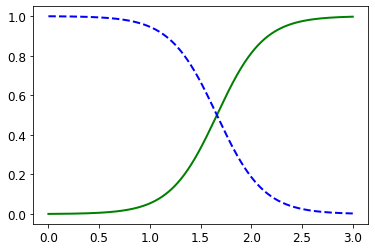

In [9]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.show()

Also compute the decision boundary, according to the estimated probabilities for the iris virginica over than 50%.

Saving figure logistic_regression_plot


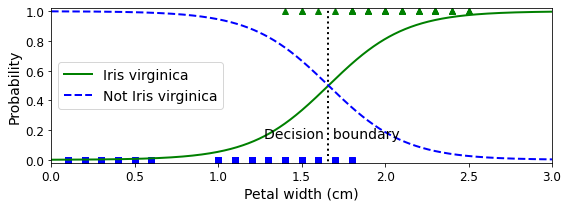

In [10]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] 

plt.figure(figsize=(8, 3))

# 0 and 1 (iris virginica)
plt.plot(X[y==0], y[y==0], "bs") # blue square
plt.plot(X[y==1], y[y==1], "g^") # green triangle
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2) #vertical dot line

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica") #green line 
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica") #blue line

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

The petal width of iris virginica flowers (triangles) ranges from 1.4 cm to 2.5 cm. The other iris flowers generally have a smaller petal width ranging from 0.1 to 1.8 cm. 

**Note**: There is a bit of overlap.

`Above about 2 cm` the classifier is hightly confident that `the flower is an iris virginica`, while `below 1 cm` it is highly confident that `the flower is not an iris virginica`.

In between these extremes, the classifier is unsure. 

In [11]:
decision_boundary

array([1.66066066])

There is a `decision boundary` at `1.6` where the probabilities are equal to `50%`:
* if `the petal width is higher than 1.6 cm`, the classifier will predict that the flower `is` an iris virginica
* if `the petal width is lower than 1.6 cm`, the classifier will predict that the flower `is not` an iris virginica

By using the `predict()` method the classifier will return whichever class is the most likely.

In [12]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [13]:
log_reg.predict([[1.5], [1.7]])

array([0, 1])

## Softmax Regression

Let's use the softmax regression to classify the iris flowers into all three classes. 

Logistic regression uses one-versus-the rest by default when train it on more than two classes. The hyperparameter `C` is the inverse of regularization strength: the higher the value of C, the less the model is regularized (the regularization is used to reduce the overfitting).

You can also specify a `solver` that supports software regression such as `lbfgs`.

In the following two features are considered: petal length and petal width. The Logistic Regression, once trained, estimates the probability that a new flower is an iris virginica. 

Saving figure logistic_regression_contour_plot


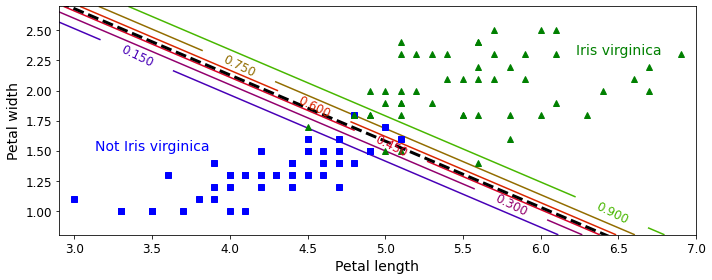

In [14]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

The dashed line represents the points where the model estimates a 50% probability. Each parallel lin represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). 

All the flowers beyond the top-right line have an over 90% chance of being iris virginica.

Let's try LogisticRegression with the hyperparameter `multi_class` to `multinomial` to switch the model to be software regression.

In [15]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10*10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=100, multi_class='multinomial', random_state=42)

Saving figure softmax_regression_contour_plot


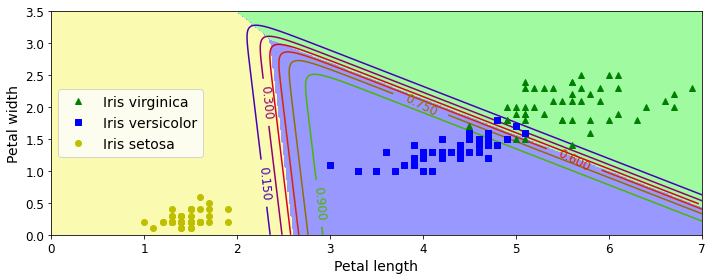

In [16]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

The decision boundaries between any two classes are linear. The probabilities for the iris versicolor class are represented by the curved lines. The line labeled with 0.450 represents the 45% probability boundary.

You can find an iris with petals that are 5 cm long and 2 cm wide.

In [17]:
softmax_reg.predict([[5, 2]])

array([2])

You can determine what type of iris it is.

In [18]:
softmax_reg.predict_proba([[5, 2]])

array([[3.30496202e-10, 1.75218967e-02, 9.82478103e-01]])

The classifier says that you have
* an iris virginica (class 2) with 98.2% probability
* an iris versicolor with 1.7% probability